In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pwd

'/home/soumyajit-ipc/Documents/repo/student-alc-result'

In [2]:
#                           INTRODUCTION:-
# This a data set cointaing details of two school students,and their grades and times the consume alcohol per week.
# This data set also incude further data of there several characeterstics,and way they spend there time.

In [3]:
#                               COLUMNS
#schoolStudent's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
#sexStudent's sex (binary: 'F' - female or 'M' - male)
#ageStudent's age (numeric: from 15 to 22)
#addressStudent's home address type (binary: 'U' - urban or 'R' - rural)
#famsize Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
#Pstatus Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)
#Medu Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
#Fedu Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
#Mjob Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#Fjob Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#reason Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
#guardianStudent's guardian (nominal: 'mother', 'father' or 'other')
#traveltime Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
#studytimeWeekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
#failures Number of past class failures (numeric: n if 1<=n<3, else 4)
#schoolsup Extra educational support (binary: yes or no)
#famsup Family educational support (binary: yes or no)
#paid Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
#activities  Extra-curricular activities (binary: yes or no)
#nursery Attended nursery school (binary: yes or no)
#higher Wants to take higher education (binary: yes or no)
#internet Internet access at home (binary: yes or no)
#romantic With a romantic relationship (binary: yes or no)
#famrel Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
#freetime Free time after school (numeric: from 1 - very low to 5 - very high)
#goout Going out with friends (numeric: from 1 - very low to 5 - very high)
#Dalc Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#Walc Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#healthCurrent health status (numeric: from 1 - very bad to 5 - very good)
#absencesNumber of school absences (numeric: from 0 to 93)
# G1 First period grade (numeric: from 0 to 20)
# G2 Second period grade (numeric: from 0 to 20)
# G3 Final grade (numeric: from 0 to 20, output target)

In [7]:
df=pd.read_csv('/home/soumyajit-ipc/Documents/repo/student-alc-result/student-mat.csv')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [8]:
#droping the columns which are not important
df.drop('famsup',axis=1,inplace=True)
df.drop('Pstatus',axis=1,inplace=True)
df.drop('famrel',axis=1,inplace=True)


In [9]:
df.head(10)

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,4,4,at_home,teacher,course,...,no,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,1,1,at_home,other,course,...,no,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,1,1,at_home,other,other,...,no,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,4,2,health,services,home,...,yes,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,3,3,other,other,home,...,no,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,4,3,services,other,reputation,...,no,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,2,2,other,other,home,...,no,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,4,4,other,teacher,home,...,no,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,3,2,services,other,home,...,no,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,3,4,other,other,home,...,no,5,1,1,1,5,0,14,15,15


In [10]:
#list of columns
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
#total alcohol consumed by students adding an extra column
df['talc']=df.Dalc+df.Walc
df.head(10)

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,talc
0,GP,F,18,U,GT3,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,2
2,GP,F,15,U,LE3,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,5
3,GP,F,15,U,GT3,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,3
5,GP,M,16,U,LE3,4,3,services,other,reputation,...,4,2,1,2,5,10,15,15,15,3
6,GP,M,16,U,LE3,2,2,other,other,home,...,4,4,1,1,3,0,12,12,11,2
7,GP,F,17,U,GT3,4,4,other,teacher,home,...,1,4,1,1,1,6,6,5,6,2
8,GP,M,15,U,LE3,3,2,services,other,home,...,2,2,1,1,1,0,16,18,19,2
9,GP,M,15,U,GT3,3,4,other,other,home,...,5,1,1,1,5,0,14,15,15,2


In [12]:
#total grades of each student adding it to column
df['Gt']=df.G1+df.G2+df.G3
df.head(10)

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,talc,Gt
0,GP,F,18,U,GT3,4,4,at_home,teacher,course,...,4,1,1,3,6,5,6,6,2,17
1,GP,F,17,U,GT3,1,1,at_home,other,course,...,3,1,1,3,4,5,5,6,2,16
2,GP,F,15,U,LE3,1,1,at_home,other,other,...,2,2,3,3,10,7,8,10,5,25
3,GP,F,15,U,GT3,4,2,health,services,home,...,2,1,1,5,2,15,14,15,2,44
4,GP,F,16,U,GT3,3,3,other,other,home,...,2,1,2,5,4,6,10,10,3,26
5,GP,M,16,U,LE3,4,3,services,other,reputation,...,2,1,2,5,10,15,15,15,3,45
6,GP,M,16,U,LE3,2,2,other,other,home,...,4,1,1,3,0,12,12,11,2,35
7,GP,F,17,U,GT3,4,4,other,teacher,home,...,4,1,1,1,6,6,5,6,2,17
8,GP,M,15,U,LE3,3,2,services,other,home,...,2,1,1,1,0,16,18,19,2,53
9,GP,M,15,U,GT3,3,4,other,other,home,...,1,1,1,5,0,14,15,15,2,44


In [13]:
#students who consume no alcohol
df[df.talc==0]

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,talc,Gt


In [14]:
#number of students who consume very high alcohol
df[df.talc>=10]

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,talc,Gt
29,GP,M,16,U,GT3,4,4,teacher,teacher,home,...,5,5,5,5,16,10,12,11,10,33
61,GP,F,16,U,GT3,1,1,services,services,course,...,5,5,5,5,6,10,8,11,10,29
66,GP,M,15,U,GT3,4,4,other,services,reputation,...,3,5,5,3,4,13,13,12,10,38
100,GP,M,16,U,GT3,4,4,services,services,other,...,5,5,5,4,14,7,7,5,10,19
223,GP,M,18,U,GT3,2,2,other,other,home,...,3,5,5,4,0,12,13,13,10,38
236,GP,M,17,U,LE3,2,2,other,other,home,...,2,5,5,4,4,14,13,13,10,40
247,GP,M,22,U,GT3,3,1,services,services,other,...,5,5,5,1,16,6,8,8,10,22
327,GP,M,17,R,GT3,2,2,services,other,course,...,5,5,5,4,8,11,10,10,10,31
349,MS,M,18,R,GT3,3,2,other,other,course,...,5,5,5,5,10,11,13,13,10,37


In [15]:
# number of times  alcohol are consumed by  students per week
df['talc'].value_counts()

2     150
3      66
4      60
5      45
6      35
7      17
10      9
8       9
9       4
Name: talc, dtype: int64

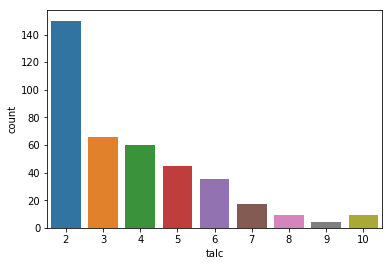

In [16]:
#most of them consume alcohol 2 times in a week
sns.countplot(x='talc',data=df)

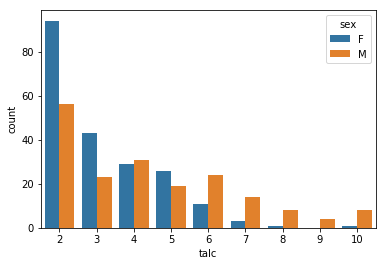

In [19]:
#number of male and female and number of times they consume alcohol per week
import seaborn as sns
sns.countplot(x='talc',data=df,hue='sex')


In [20]:
# avg of the age,and total grades to number of times they consume alcohol 
df.groupby('talc')['age','Gt','health','absences'].mean()

,age,Gt,health,absences
talc,,,,
2,16.453333,33.100000,3.433333,4.886667
3,16.772727,32.151515,3.515152,4.818182
4,16.916667,32.266667,3.516667,5.100000
5,16.644444,32.200000,3.577778,7.755556
6,17.057143,27.914286,3.914286,7.057143
7,16.823529,30.823529,3.941176,7.000000
8,16.222222,31.222222,3.444444,6.111111
9,18.000000,28.500000,3.750000,12.500000
10,17.222222,31.888889,3.888889,8.666667


In [22]:
df['talc'].unique()

array([ 2,  5,  3,  4,  6, 10,  7,  8,  9])

In [23]:
y=df['talc'].unique()
grade=df.groupby('talc')['Gt'].mean()

Text(0, 0.5, 'average grades of students')

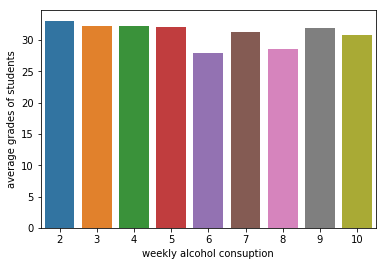

In [26]:
#graph between weekly alcohol consuption and average grades of student
import matplotlib.pyplot as plt
sns.barplot(x=y,y=grade)
plt.xlabel('weekly alcohol consuption')
plt.ylabel('average grades of students')
#students who consume alcohol 2 times a week have better performance than who consume alcohol more in aweek

In [27]:
df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [28]:
df.groupby('age')['talc'].count()

age
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: talc, dtype: int64

In [29]:
z=df.groupby('age')['talc'].count()


Text(0, 0.5, 'weely total alcohol consuption by age group')

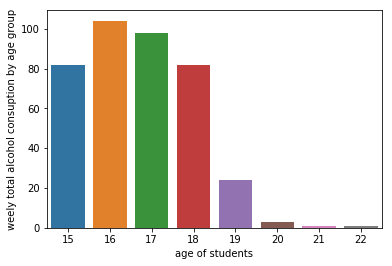

In [30]:
#graph between times age groups and times they consume alcohol in week
sns.barplot(x=[15,16,17,18,19,20,21,22],y=z)
plt.xlabel('age of students')
plt.ylabel('weely total alcohol consuption by age group')
# age group of 16 consume more alcohol per week

In [32]:
#health condtion and times they consume alcohol
df.groupby('health')['talc'].count()


health
1     47
2     45
3     91
4     66
5    146
Name: talc, dtype: int64

In [33]:
f=df.groupby('health')['talc'].count()

Text(0, 0.5, 'weely total alcohol consuption')

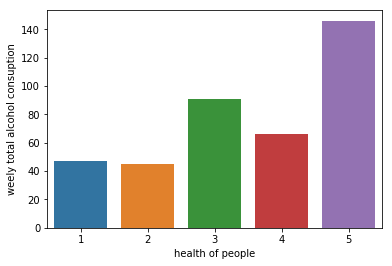

In [36]:
# graph between health condtion and times they consume alcohol
sns.barplot(x=[1,2,3,4,5],y=f)
plt.xlabel('health of people')
plt.ylabel('weely total alcohol consuption')
#students with good health (5) consume more alcohol

In [37]:
df.groupby('sex')['talc'].count()

sex
F    208
M    187
Name: talc, dtype: int64

In [38]:
c=df.groupby('sex')['talc'].count()

Text(0, 0.5, 'weely total consuption of alcohol')

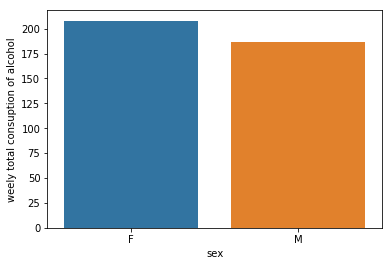

In [40]:
#graph between sex and amount of alcohol they consume
sns.barplot(x=['F','M'],y=c)
plt.xlabel('sex')
plt.ylabel('weely total consuption of alcohol')
# female students consume more alcohol than male